In [637]:
import sys
sys.path.append("../../src")

In [638]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [639]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [640]:
import data

In [641]:
# set db path hackily
data._get_connection("../../data/participants.db")

EXPERIMENT_ID = "05_comprehension_spray-load-construction-meaning"

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A3V4AW6DGWBHDO:3ERET4BTVNXKIYLUH76KIW70TBHK9X. Status was 1.


In [642]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

Dropping 0 dupe results.


In [643]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [644]:
# Convert condition_id to independent features
response_df["theme_is_object"] = response_df["condition_0"] == 1
response_df["location_is_heavy"] = response_df["condition_1"] == 1
response_df["theme_is_heavy"] = response_df["condition_2"] == 1

In [645]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [646]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [647]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,survey_answer,slider_value,slider_copout,condition_0,condition_1,condition_2,theme_is_object,location_is_heavy,theme_is_heavy,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,A3V2XCDF45VN9X:39U1BHVTDMFX6FM1U7J2SARACV8T33,0,0,39U1BHVTDMFX6FM1U7J2SARACV8T33,A3V2XCDF45VN9X,3TRB893CSJY8F93PMHIJIOSAUYOG7T,html-slider-response-with-copout,30833.1,0.0-3.0,2021-09-28 19:19:26.117,05_comprehension_spray-load-construction-meaning,...,NaN,100.0,False,practice,fill,full,False,False,False,0.698206
4,A3V2XCDF45VN9X:39U1BHVTDMFX6FM1U7J2SARACV8T33,0,0,39U1BHVTDMFX6FM1U7J2SARACV8T33,A3V2XCDF45VN9X,3TRB893CSJY8F93PMHIJIOSAUYOG7T,html-slider-response-with-copout,5892.5,0.0-4.0,2021-09-28 19:19:32.012,05_comprehension_spray-load-construction-meaning,...,NaN,100.0,False,practice,fill,full,False,False,False,0.698206
5,A3V2XCDF45VN9X:39U1BHVTDMFX6FM1U7J2SARACV8T33,0,0,39U1BHVTDMFX6FM1U7J2SARACV8T33,A3V2XCDF45VN9X,3TRB893CSJY8F93PMHIJIOSAUYOG7T,html-slider-response-with-copout,60231.6,0.0-5.0,2021-09-28 19:20:32.245,05_comprehension_spray-load-construction-meaning,...,NaN,0.0,False,practice,cover,empty,False,False,False,-2.264366
6,A3V2XCDF45VN9X:39U1BHVTDMFX6FM1U7J2SARACV8T33,0,0,39U1BHVTDMFX6FM1U7J2SARACV8T33,A3V2XCDF45VN9X,3TRB893CSJY8F93PMHIJIOSAUYOG7T,html-slider-response-with-copout,4690.9,0.0-6.0,2021-09-28 19:20:36.938,05_comprehension_spray-load-construction-meaning,...,NaN,0.0,False,practice,fill,empty,False,False,False,-2.264366
7,A3V2XCDF45VN9X:39U1BHVTDMFX6FM1U7J2SARACV8T33,0,0,39U1BHVTDMFX6FM1U7J2SARACV8T33,A3V2XCDF45VN9X,3TRB893CSJY8F93PMHIJIOSAUYOG7T,html-slider-response-with-copout,12338.6,0.0-7.0,2021-09-28 19:20:49.278,05_comprehension_spray-load-construction-meaning,...,NaN,100.0,False,practice,cover,full,False,False,False,0.698206


In [648]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [649]:
N = len(response_df.reset_index().uniqueid.unique())
N

46

### Demo

In [650]:
qualitative_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

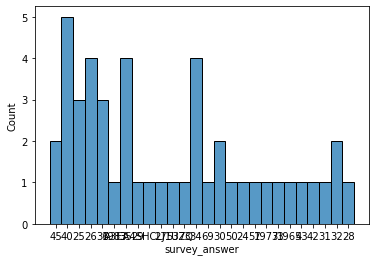

In [651]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int, errors="ignore")
sns.histplot(ages)

In [652]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    32
Master's degree       7
Some college          4
High school/GED       2
Ph.D.                 1
Name: survey_answer, dtype: int64

In [653]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    44
No      2
Name: survey_answer, dtype: int64

### Comments

In [654]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer)

['none',
 '',
 'well nice one',
 'no',
 'good',
 '',
 '',
 'GOOD',
 'good',
 '',
 'good',
 '',
 'n/a',
 'None',
 '',
 '',
 '',
 'Good work',
 '',
 'good',
 'n/a',
 'good',
 'GOOD',
 'good',
 'None',
 'VERY ENJOY IN THE SURVUY',
 'thanks',
 'NO',
 'hanks for the giving survey',
 'good',
 '',
 '',
 'good',
 '',
 '',
 'none',
 'It was very interesting. Thank you.',
 'good one.',
 '',
 '',
 'NICE',
 'good',
 'No comments',
 'no',
 '',
 'in this study was good']

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

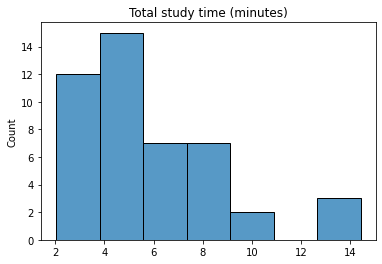

In [655]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [656]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.789806
std     3.137118
Name: rt, dtype: float64

### Response times

In [657]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

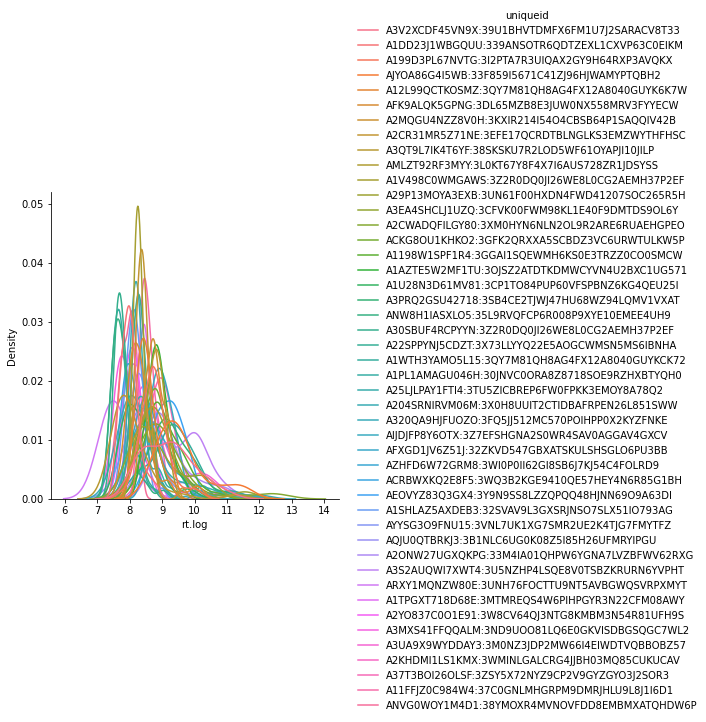

In [658]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

In [659]:
# sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
# plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

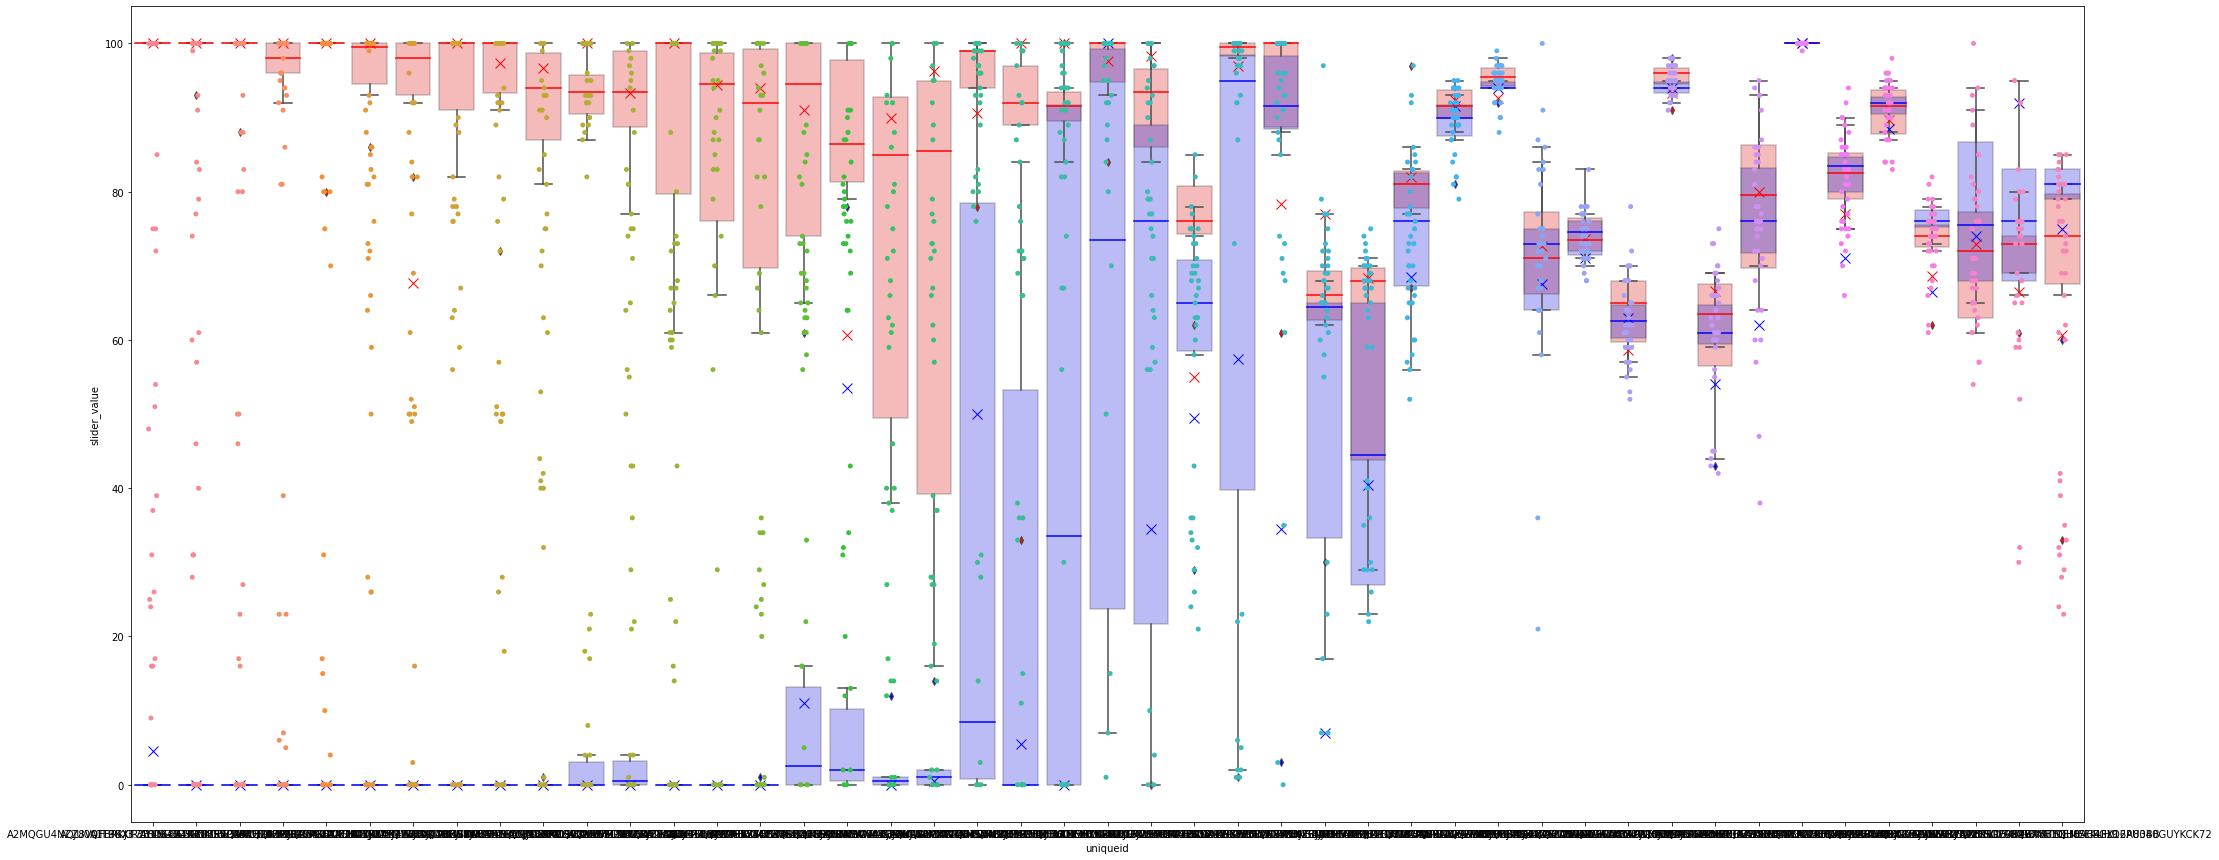

In [660]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(35, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [661]:
practice_df = response_df[response_df.condition_0 == "practice"]
practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)

<ipython-input-661-380d923c644c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
<ipython-input-661-380d923c644c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)


In [662]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = set()

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [663]:
practice_df.groupby("practice_id").match.mean()

practice_id
coverempty    0.630435
coverfull     0.891304
fillempty     0.478261
fillfull      0.913043
Name: match, dtype: float64

/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


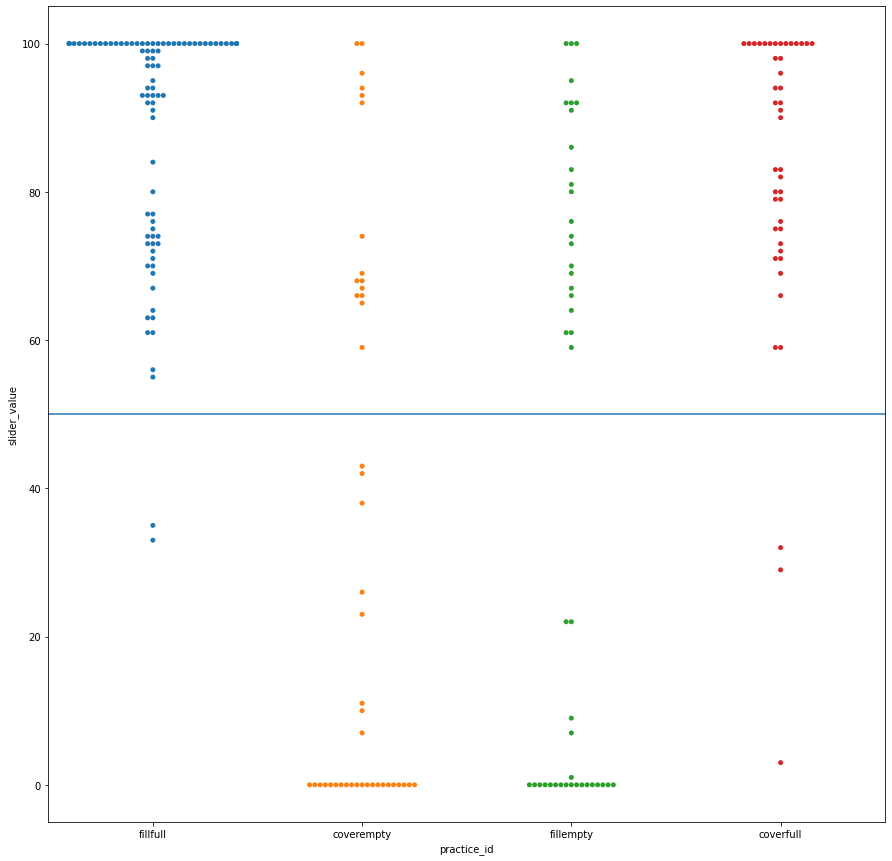

In [664]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [665]:
practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
fillfull,0.065217,92
coverempty,0.043478,46
coverfull,0.043478,46
fillempty,0.021739,46


### Fillers

<AxesSubplot:xlabel='t'>

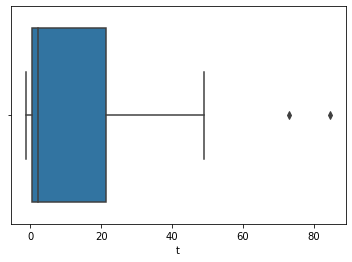

In [666]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [667]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
A1PL1AMAGU046H:30JNVC0ORA8Z8718SOE9RZHXBTYQH0,-1.268925,2.332075e-01
A1WTH3YAMO5L15:3QY7M81QH8AG4FX12A8040GUYKCK72,-1.203374,2.565458e-01
AFXGD1JV6Z51J:32ZKVD547GBXATSKULSHSGLO6PU3BB,-1.006833,3.434936e-01
ANW8H1IASXLO5:35L9RVQFCP6R008P9XYE10EMEE4UH9,-0.609321,5.559013e-01
A1SHLAZ5AXDEB3:32SVAV9L3GXSRJNSO7SLX51IO793AG,-0.497519,6.295806e-01
A30SBUF4RCPYYN:3Z2R0DQ0JI26WE8L0CG2AEMH37P2EF,-0.168497,8.695517e-01
A199D3PL67NVTG:3I2PTA7R3UIQAX2GY9H64RXP3AVQKX,0.054841,9.573454e-01
ANVG0WOY1M4D1:38YMOXR4MVNOVFDD8EMBMXATQHDW6P,0.123773,9.039474e-01
A3QT9L7IK4T6YF:38SKSKU7R2LOD5WF61OYAPJI10JILP,0.193269,8.522368e-01


#### Filler copouts

In [668]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
9.0,full,0.065217,3,46
3.0,empty,0.043478,2,46
5.0,empty,0.043478,2,46
6.0,full,0.043478,2,46
10.0,full,0.043478,2,46
11.0,full,0.043478,2,46
0.0,empty,0.021739,1,46
1.0,empty,0.021739,1,46
2.0,empty,0.021739,1,46


#### Filler failures by item

In [669]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

<ipython-input-669-5f9f2f07b75b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [670]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        0.586957
             1.0        0.434783
             2.0        0.434783
             3.0        0.456522
             4.0        0.521739
             5.0        0.565217
full         6.0        0.956522
             7.0        0.934783
             8.0        0.913043
             9.0        0.847826
             10.0       0.934783
             11.0       0.913043
Name: match, dtype: float64

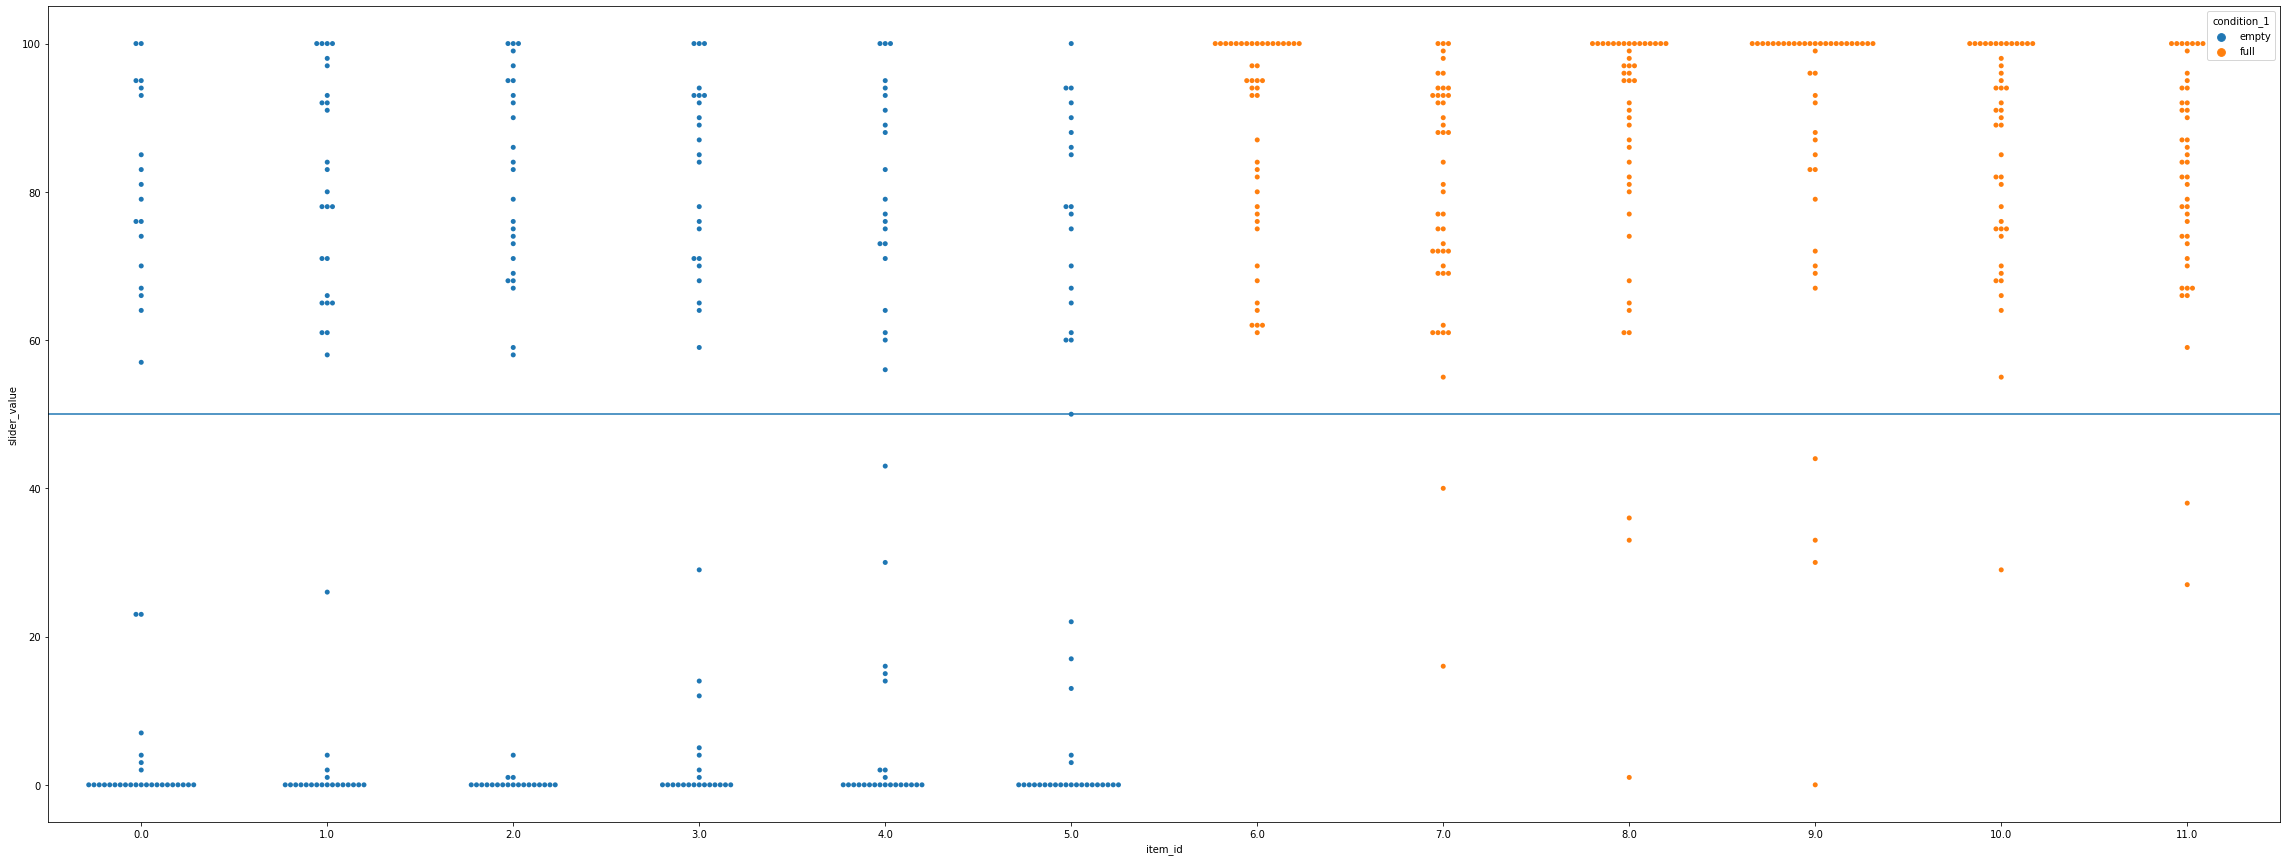

In [671]:
plt.subplots(figsize=(40,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [672]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [673]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.66).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / N * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

20 subjects (43.5%) disqualified and dropped due to failed practice.
	A2KHDMI1LS1KMX:3WMINLGALCRG4JJBH03MQ85CUKUCAV
	A1U28N3D61MV81:3CP1TO84PUP60VFSPBNZ6KG4QEU25I
	AJYOA86G4I5WB:33F859I5671C41ZJ96HJWAMYPTQBH2
	A3QT9L7IK4T6YF:38SKSKU7R2LOD5WF61OYAPJI10JILP
	AZHFD6W72GRM8:3WI0P0II62GI8SB6J7KJ54C4FOLRD9
	A1PL1AMAGU046H:30JNVC0ORA8Z8718SOE9RZHXBTYQH0
	A12L99QCTKOSMZ:3QY7M81QH8AG4FX12A8040GUYK6K7W
	A3MXS41FFQQALM:3ND9UOO81LQ6E0GKVISDBGSQGC7WL2
	A30SBUF4RCPYYN:3Z2R0DQ0JI26WE8L0CG2AEMH37P2EF
	A1WTH3YAMO5L15:3QY7M81QH8AG4FX12A8040GUYKCK72
	A22SPPYNJ5CDZT:3X73LLYYQ22E5AOGCWMSN5MS6IBNHA
	A2CR31MR5Z71NE:3EFE17QCRDTBLNGLKS3EMZWYTHFHSC
	ANW8H1IASXLO5:35L9RVQFCP6R008P9XYE10EMEE4UH9
	A37T3BOI26OLSF:3ZSY5X72NYZ9CP2V9GYZGYO3J2SOR3
	A1V498C0WMGAWS:3Z2R0DQ0JI26WE8L0CG2AEMH37P2EF
	A3S2AUQWI7XWT4:3U5NZHP4LSQE8V0TSBZKRURN6YVPHT
	AFXGD1JV6Z51J:32ZKVD547GBXATSKULSHSGLO6PU3BB
	A2CWADQFILGY80:3XM0HYN6NLN2OL9R2ARE6RUAEHGPEO
	A204SRNIRVM06M:3X0H8UUIT2CTIDBAFRPEN26L851SWW
	A1SHLAZ5AXDEB3:32SVAV9L3GXSRJNSO7SLX51IO7

In [674]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

20 subjects remaining.


### Merge in materials

In [675]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["item_key"] = materials_df.V.str.cat(materials_df["T"], sep=" ")

# NB this doesn't handle fillers correctly

In [676]:
keep_cols = ["item_key", "T", "T heavy", "L", "L heavy", "V", "V pres", "scale type", "T plural?", "T mass?", "L plural?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

#### Add frequency data

In [677]:
freqs = {}
with open("../../data/wikitext-2_train_vocab.txt") as f:
    for line in f:
        if line.strip():
            token, freq = line.strip().split("\t")
            freqs[token.strip()] = int(freq)

In [678]:
merged_df["V freq"] = merged_df["V pres"].map(freqs)

### Filter out items which were dropped in later materials iterations

In [679]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, spray-load-002-indefinite.


### Export

In [680]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [681]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("theme_is_object")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    theme_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - theme_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "item_key", "T mass?", "scale type"]) \
    .apply(compute_item_difference) \
    .rename("LocationObject - ThemeObject")

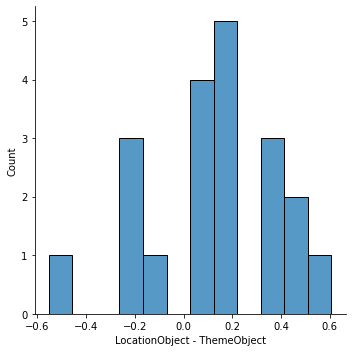

In [682]:
sns.displot(item_differences, bins=12)

In [683]:
item_differences.sort_values(ascending=False)

item_id  item_key                  T mass?  scale type
35.0     squirt water              True     cover         0.607525
16.0     plant lavender seedlings  False    cover         0.497424
10.0     inject jelly              True     fill          0.414629
7.0      dust sugar                True     cover         0.412511
14.0     pack soil                 True     fill          0.353298
41.0     stuff money               True     fill          0.323469
12.0     load hay                  True     fill          0.204762
43.0     wrap tape                 True     cover         0.192781
36.0     stack books               False    fill          0.174553
32.0     spray paint               True     cover         0.145653
26.0     smear grease              True     cover         0.141050
9.0      heap appetizers           False    cover         0.115098
38.0     stock spices              False    fill          0.087572
0.0      brush powder              True     cover         0.085721
34.0   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'dab ointment'),
  Text(1, 0, 'cram clothes'),
  Text(2, 0, 'slather mayonnaise'),
  Text(3, 0, 'rub marinade'),
  Text(4, 0, 'drizzle frosting'),
  Text(5, 0, 'sprinkle nuts'),
  Text(6, 0, 'brush powder'),
  Text(7, 0, 'stock spices'),
  Text(8, 0, 'heap appetizers'),
  Text(9, 0, 'smear grease'),
  Text(10, 0, 'spray paint'),
  Text(11, 0, 'stack books'),
  Text(12, 0, 'wrap tape'),
  Text(13, 0, 'load hay'),
  Text(14, 0, 'stuff money'),
  Text(15, 0, 'pack soil'),
  Text(16, 0, 'dust sugar'),
  Text(17, 0, 'inject jelly'),
  Text(18, 0, 'plant lavender seedlings'),
  Text(19, 0, 'squirt water')])

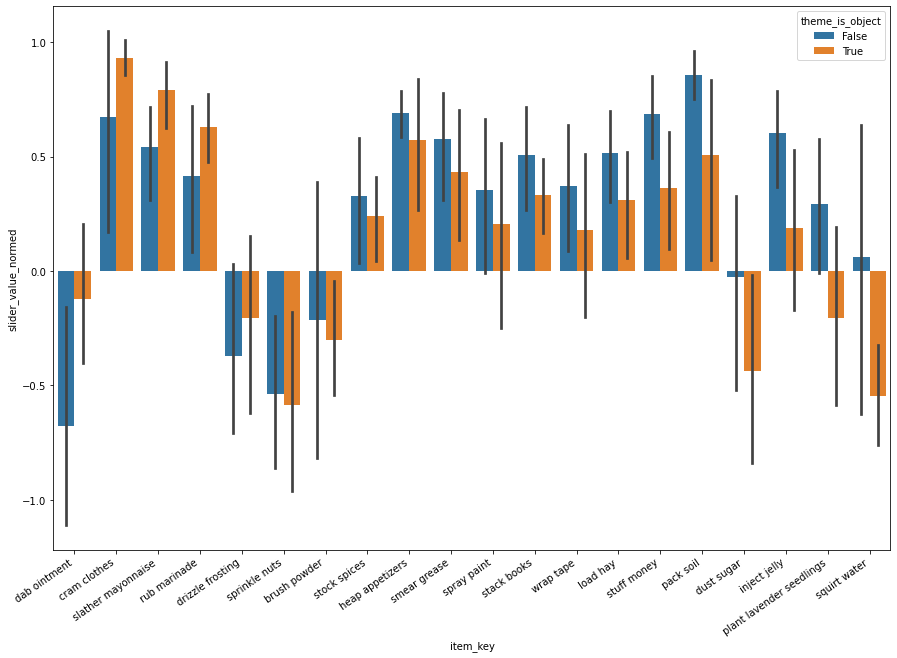

In [684]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="item_key", hue="theme_is_object", y="slider_value_normed",
            order=item_differences.sort_values().index.get_level_values("item_key"))
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='T mass?', ylabel='LocationObject - ThemeObject'>

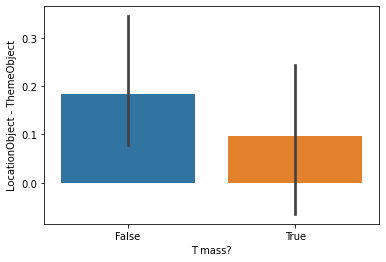

In [685]:
sns.barplot(data=item_differences.reset_index(), x="T mass?", y="LocationObject - ThemeObject")

### By scale type

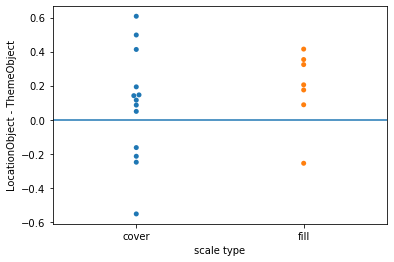

In [686]:
ax = sns.swarmplot(data=item_differences.reset_index(), x="scale type", y="LocationObject - ThemeObject")
ax.axhline(0)

### Bootstrap check

In [687]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.025, 0.975])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

# item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
# item_bootstrap_df

In [688]:
# item_bootstrap_df = \
#     pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
#              left_index=True, right_index=True).sort_values("low", ascending=False)

In [689]:
# item_bootstrap_df.sort_values("low", ascending=False)

In [690]:
# plt.subplots(figsize=(15, 15))
# sns.barplot(
#     data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
#     x="AV", y="value", hue="variable")
# plt.xticks(rotation=35, ha="right")

### Copouts

In [691]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [692]:
copouts = merged_df.groupby(["materials_id", "item_id", "theme_is_object"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "theme_is_object"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

slider_copout            sum  count      mean
item_id theme_is_object                      
26.0    True               1     11  0.090909
0.0     False              0      6  0.000000
        True               0     14  0.000000
25.0    False              0     12  0.000000
        True               0      8  0.000000
26.0    False              0      9  0.000000
32.0    False              0     14  0.000000
        True               0      6  0.000000
34.0    False              0     11  0.000000
        True               0      9  0.000000
35.0    False              0      4  0.000000
        True               0     16  0.000000
36.0    False              0     10  0.000000
        True               0     10  0.000000
38.0    False              0      9  0.000000
        True               0     11  0.000000
41.0    False              0      9  0.000000
        True               0     11  0.000000
43.0    False              0     10  0.000000
19.0    True               0      7  0.000000
        False              0     13  0.000000
16.0    True               0      7  0.000000
7.0     True               0     12  0.000000
1.0     False              0      7  0.000000
        True               0     13  0.000000
4.0     False              0      7  0.000000
        True               0     13  0.000000
6.0     False              0     10  0.000000
        True               0     10  0.000000
7.0     False              0      8  0.000000
9.0     False              0     12  0.000000
16.0    False              0     13  0.000000
9.0     True               0      8  0.000000
10.0    False              0      8  0.000000
        True               0     12  0.000000
12.0    False              0      8  0.000000
        True               0     12  0.000000
14.0    False              0     10  0.000000
        True               0     10  0.000000
43.0    True               0     10  0.000000

<AxesSubplot:xlabel='item_key', ylabel='slider_copout'>

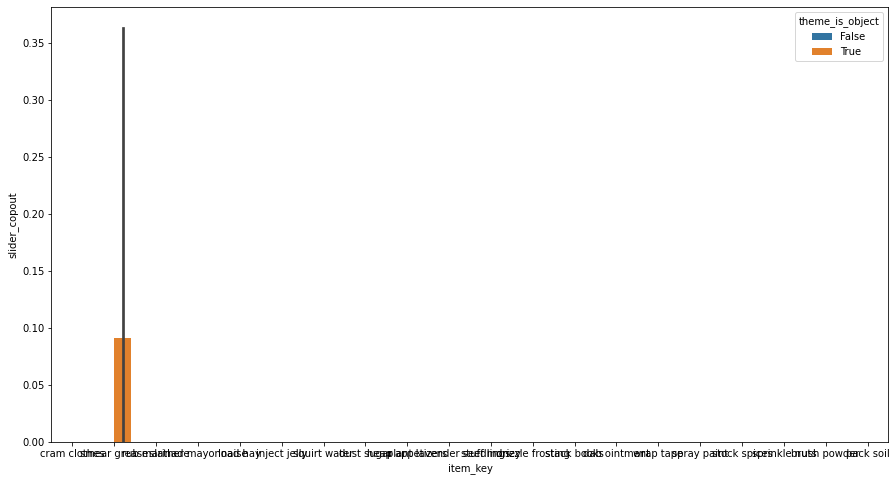

In [693]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="item_key", y="slider_copout", hue="theme_is_object")

<AxesSubplot:xlabel='T mass?', ylabel='slider_copout'>

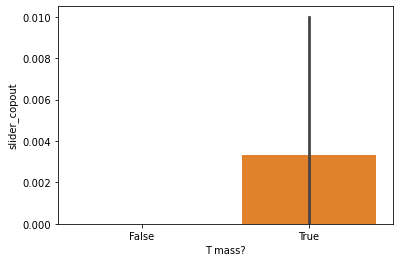

In [694]:
sns.barplot(data=merged_df, x="T mass?", y="slider_copout")

## Item exposure

In [695]:
merged_df.groupby(["item_id", "item_key", "theme_is_object"]).size().sort_values().head(20)

item_id  item_key                  theme_is_object
35.0     squirt water              False               4
0.0      brush powder              False               6
32.0     spray paint               True                6
19.0     rub marinade              True                7
16.0     plant lavender seedlings  True                7
1.0      cram clothes              False               7
4.0      dab ointment              False               7
25.0     slather mayonnaise        True                8
7.0      dust sugar                False               8
9.0      heap appetizers           True                8
10.0     inject jelly              False               8
12.0     load hay                  False               8
26.0     smear grease              False               9
41.0     stuff money               False               9
34.0     sprinkle nuts             True                9
38.0     stock spices              False               9
36.0     stack books               Fa